In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os
import pandas as pd
import h5py
from skimage.transform import resize

In [13]:
train_df = pd.read_csv('../data/train.csv')
print(train_df.shape)
train_df.head()

(21806, 2)


,ID,Label
0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,8|5|0
1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,14|0
2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,6|1
3,5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0,16|10
4,5b931256-bb99-11e8-b2b9-ac1f6b6435d0,14|0


In [5]:
hpa_cell_mask_list = os.listdir('../data/hpa_cell_mask')
print(hpa_cell_mask_list[:10])

['5b4a9712-bb9c-11e8-b2b9-ac1f6b6435d0.npz', 'e5c0bf54-bbb8-11e8-b2ba-ac1f6b6435d0.npz', 'f964b18e-bbac-11e8-b2ba-ac1f6b6435d0.npz', '8d2260ae-bbbe-11e8-b2ba-ac1f6b6435d0.npz', '776fe4c0-bba0-11e8-b2b9-ac1f6b6435d0.npz', '83600d0a-bbb9-11e8-b2ba-ac1f6b6435d0.npz', 'e39be6d8-bba7-11e8-b2ba-ac1f6b6435d0.npz', 'd01751ae-bba4-11e8-b2ba-ac1f6b6435d0.npz', 'cb0daad6-bbaa-11e8-b2ba-ac1f6b6435d0.npz', 'a9aaf8ae-bbc7-11e8-b2bc-ac1f6b6435d0.npz']


In [23]:
img_mask = np.load(os.path.join('../data/hpa_cell_mask',hpa_cell_mask_list[0]))['arr_0'].astype(np.uint8)

(2048, 2048)


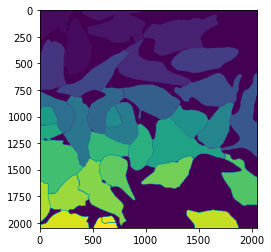

In [24]:
print(img_mask.shape)
plt.imshow(img_mask)

In [3]:

print(image.shape)
#plt.imshow(img_red)

(2048, 2048, 4)


In [25]:
def img_splitter(im_tok):
    #img_filename = img_token+'.png'
    
    
    img_red    = np.expand_dims(imageio.imread(os.path.join('../data/train',f'{im_tok}_red.png')), axis = -1)
    img_yellow = np.expand_dims(imageio.imread(os.path.join('../data/train',f'{im_tok}_yellow.png')), axis = -1)
    img_green  = np.expand_dims(imageio.imread(os.path.join('../data/train',f'{im_tok}_green.png')), axis = -1)
    img_blue   = np.expand_dims(imageio.imread(os.path.join('../data/train',f'{im_tok}_blue.png')), axis = -1)
    image = np.concatenate([img_red, img_yellow, img_green, img_blue], axis=-1)
    img_mask = np.load(os.path.join('../data/hpa_cell_mask',f'{im_tok}.npz'))['arr_0'].astype(np.uint8)

    #area_list = []
    crop_img_list = []
    
    for i in range(1, img_mask.max() + 1):
        bmask = img_mask == i
        bmask = np.expand_dims(bmask, axis = -1)
        bmask = np.concatenate([bmask, bmask, bmask, bmask], axis=-1)
        masked_img = image * bmask

        true_points = np.argwhere(bmask)
        top_left = true_points.min(axis=0)
        bottom_right = true_points.max(axis=0)
        cropped_arr = masked_img[top_left[0]:bottom_right[0]+1,top_left[1]:bottom_right[1]+1]
        #print(cropped_arr.shape)
        #print('Area: ',cropped_arr.shape[0] * cropped_arr.shape[1])
        if cropped_arr.shape[0] * cropped_arr.shape[1] > 100000:
            #print(cropped_arr.min(), cropped_arr.max())
            cropped_arr = resize(cropped_arr, (224, 224))
            #print(cropped_arr.min(), cropped_arr.max())
            #area_list.append(cropped_arr.shape[0] * cropped_arr.shape[1]
            crop_img_list.append(cropped_arr)
            
            #pass
    crop_img_arr = np.array(crop_img_list)
    #print(crop_img_arr.min(), crop_img_arr.max())
    hdf5_path = os.path.join('../data/train_h5_224',f'{im_tok}.hdf5')
    hdf5_file = h5py.File(hdf5_path, mode='w')
    hdf5_file.create_dataset("train_img",crop_img_arr.shape,np.float)
    hdf5_file["train_img"][...] = crop_img_arr
    hdf5_file.close()
    return crop_img_list
    

In [14]:
img_token_list = train_df['ID'].values

In [26]:
for i in  img_token_list[:3]:
    crop_img_list = img_splitter(i)

In [14]:
len(crop_img_list)

15

In [22]:
crop_img_list[-13][:,:,0].shape

(224, 224)

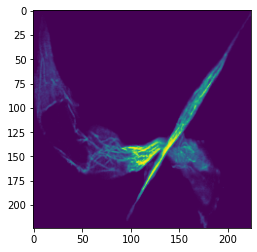

In [30]:
plt.imshow(crop_img_list[-12][:,:,0])

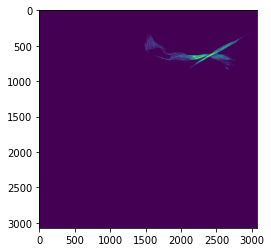

In [31]:
plt.imshow(mask_img_list[-12][:,:,0])

In [49]:
area_list

[294516,
 188480,
 272764,
 311190,
 118096,
 154548,
 304920,
 201608,
 275616,
 175480,
 148519,
 128310,
 186093,
 125928,
 150768,
 32494,
 108810,
 29548,
 351130,
 31930,
 103332,
 116230,
 206444,
 166896,
 143472,
 152694,
 299376,
 136964,
 38121,
 82960,
 77154,
 9030,
 22848]

In [2]:
hdf5_path = os.path.join('../data/train_h5_224',f'{"5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0"}.hdf5')
hdf5_file = h5py.File(hdf5_path,"r")
train_x = hdf5_file['train_img']
train_x.shape

(17, 224, 224, 4)

In [3]:
train_x[0].shape

(224, 224, 4)

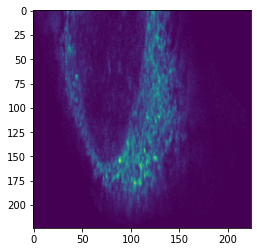

In [4]:
plt.imshow(train_x[0][:,:,1])